# Attrition Analysis using Logistic Regression:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(11.28) 
# 11.28 is the mean of TotalWorkingYears column 

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(2)
# 2 is the median of NumCompaniesWorked

In [7]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

### Histogram:

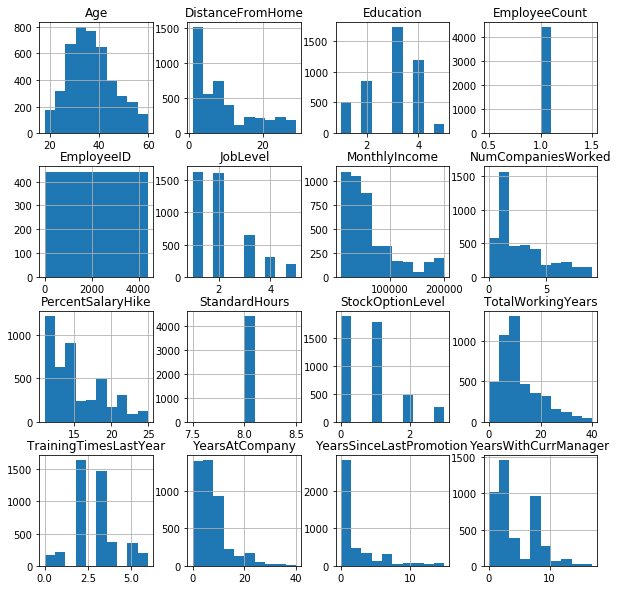

In [8]:
df.hist(figsize=(10,10))
plt.show()

### Boxplot:

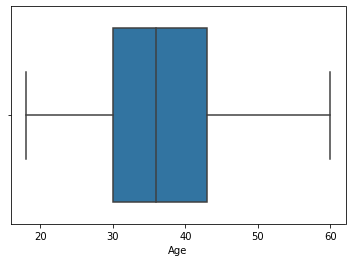

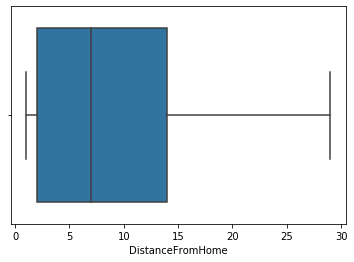

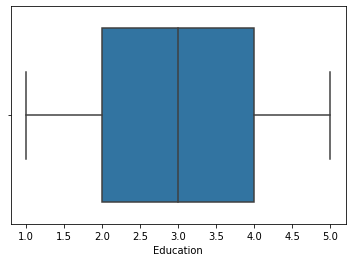

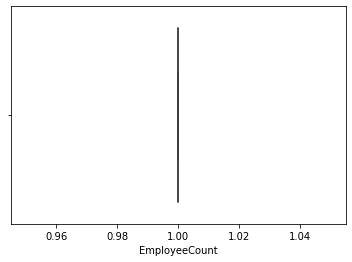

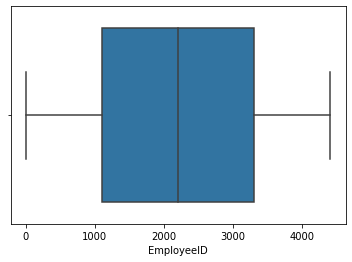

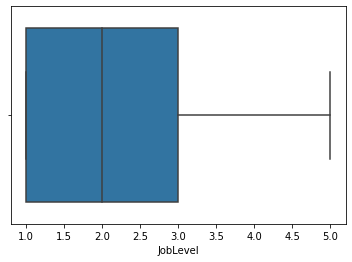

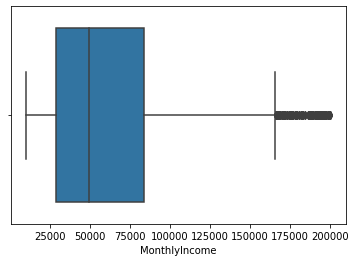

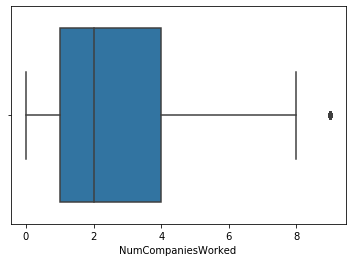

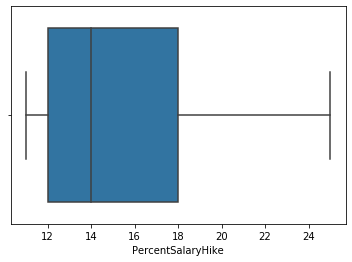

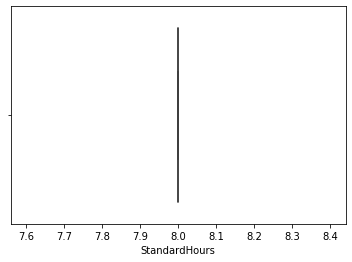

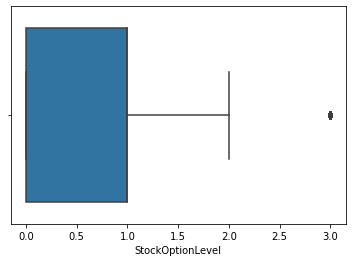

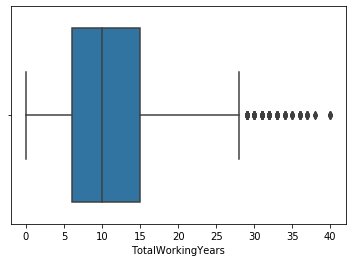

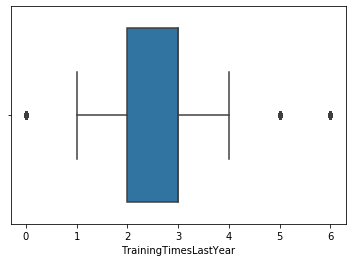

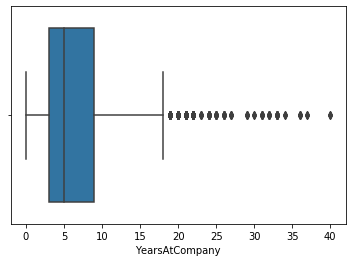

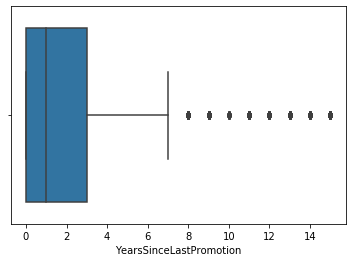

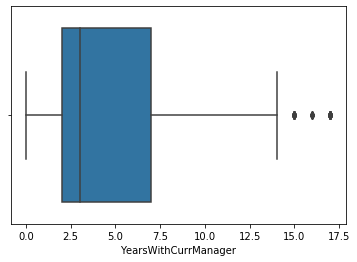

In [9]:
col = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for i in col:
    sns.boxplot(df[i])
    plt.show()

### Inference from BoxPlots:
##### Ploted Box Plot for all the Continous Variable ( int and float not object type variable)
- Age, DistanceFromHome, Education, EmployeeID, JobLevel, PercentSalaryHike : Donot have any outlier
- NumCompaniesWorked, StockOptionLevel has Single Outlier
- MonthlyIncome has Many Outliers
- TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion have Moderate Outliers
- TrainingTimesLastYear, YearsWithCurrManager : Have Some Outliers
- EmployeeCount , StandardHours : Just have a line ( Irrelevant Columns of DataSet )

### Converting Text Column to Categorical Form:

In [10]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df['Attrition'] = lab.fit_transform(df['Attrition'])
df['BusinessTravel'] = lab.fit_transform(df['BusinessTravel'])
df['Department'] = lab.fit_transform(df['Department'])
df['Over18'] = lab.fit_transform(df['Over18'])
df['MaritalStatus'] = lab.fit_transform(df['MaritalStatus'])
df['JobRole'] = lab.fit_transform(df['JobRole'])
df['Gender'] = lab.fit_transform(df['Gender'])
df['EducationField'] = lab.fit_transform(df['EducationField'])

In [12]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.00,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.00,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.00,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.00,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.00,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,1,4406,0,...,3.0,0,17,8,1,10.00,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,...,2.0,0,15,8,0,10.00,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,...,0.0,0,20,8,0,5.00,4,4,1,2
4408,42,0,2,2,18,2,3,1,4409,1,...,0.0,0,14,8,1,10.00,2,9,7,8


In [13]:
df = df.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


### Splitting the dataset:

In [14]:
y = df.iloc[:,1:2]
y.head()
x = df.drop(['Attrition'], axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


### Logistic Regression:

In [15]:
import statsmodels.api as sm

In [16]:
x1 = sm.add_constant(x)

In [17]:
logistic = sm.Logit(y,x1)

In [18]:
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393030
         Iterations 7


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.1102
Time:                        11:44:06   Log-Likelihood:                -1733.3
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.584e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0771      0.414      0.186      0.852      -0.734       0.888
Age                        -0.0309      0.007     -4.525      0.000      -0.044      -0.018
BusinessTravel             -0.0177      0.065     -0.271      0.786      -0.146       0.111
Department                 -0.2423      0.081     -2.981      0.003      -0.402      -0.083
DistanceFromHome           -0.0013      0.005     -0.247      0.805      -0.012       0.009
Education                  -0.0627      0.043     -1.472      0.141      -0.146       0.021
EducationField             -0.0965      0.033     -2.894      0.004      -0.162      -0.031
Gender                      0.0861      0.090      0.962      0.336      -0.089       0.262
JobLevel                   -0.0240      0.040     -0.605      0.545      -0.102       0.054
JobRole                     0.0377      0.018      2.109      0.035       0.003       0.073
MaritalStatus               0.5885      0.063      9.320      0.000       0.465       0.712
MonthlyIncome           -1.876e-06   9.56e-07     -1.963      0.050   -3.75e-06   -2.63e-09
NumCompaniesWorked          0.1161      0.018      6.328      0.000       0.080       0.152
PercentSalaryHike           0.0118      0.012      1.004      0.315      -0.011       0.035
StockOptionLevel           -0.0640      0.052     -1.239      0.215      -0.165       0.037
TotalWorkingYears          -0.0573      0.012     -4.817      0.000      -0.081      -0.034
TrainingTimesLastYear      -0.1467      0.035     -4.172      0.000      -0.216      -0.078
YearsAtCompany              0.0120      0.018      0.655      0.513      -0.024       0.048
YearsSinceLastPromotion     0.1322      0.020      6.457      0.000       0.092       0.172
YearsWithCurrManager       -0.1395      0.022     -6.309      0.000      -0.183      -0.096
===========================================================================================
"""

### Inference from Logistic Regression:

- BusinessTravel, DistanceFromHome, Education, Gender, JobLevel, PercentSalaryHike, StockOptionLevel, YearsAtCompany have p value more than 0.05 ie, They are Not Significantly Important
- Age, Department, EducationField, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsSinceLastPromotion, YearsWithCurrManager has p value less than 0.05 ie, They are Significantly Important.
- Out of All the Attributes which are having p values less than 0.05, Age, MaritalStatus, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsSinceLastPromotion and YearsWithCurrManager are most significant.